In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../data/SeaGrant-TA_DIC-MassBayData/concat/ToRies_Labprocessed2017_to_2021.csv')

In [13]:
# StationID, pH <2>, TA in (mmol/kgSW) TCO2 in (mmol/kgSW)

# Remove all spaces from the StationID column
data['StationID'] = data['StationID'].str.replace(' ', '')

# Get all unique station IDs
station_ids = data['StationID'].unique()

# Create a dictionary to store the data
graphing_data = pd.DataFrame(columns=['StationID', 'pH', 'TA', 'DIC'])
graphing_data.set_index('StationID', inplace=True)

for station_id in station_ids:
  station_data = data[data['StationID'] == station_id]
  graphing_data.loc[station_id, 'pH'] = list(station_data['pH <2>'])
  graphing_data.loc[station_id, 'TA'] = list(station_data['TA in (mmol/kgSW)'])
  graphing_data.loc[station_id, 'DIC'] = list(station_data['TCO2 in (mmol/kgSW)'])
  graphing_data.loc[station_id, 'date'] = list(station_data['date'])


<ipython-input-22-31ea4da429ba>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


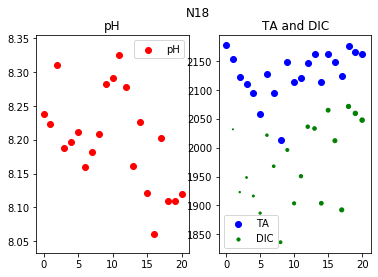

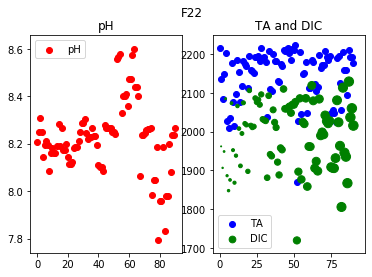

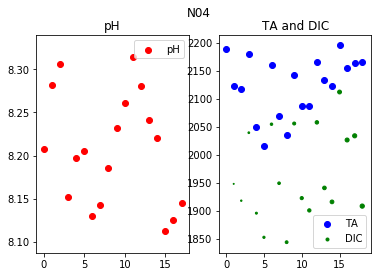

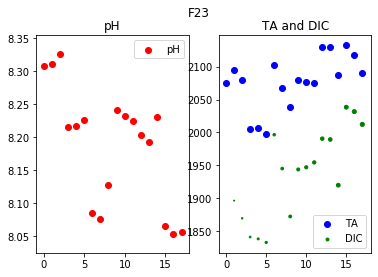

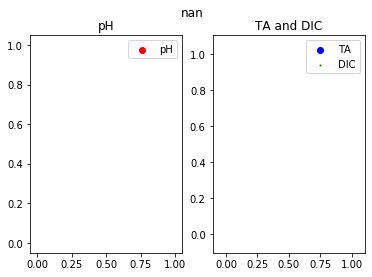

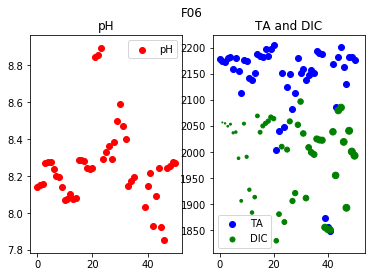

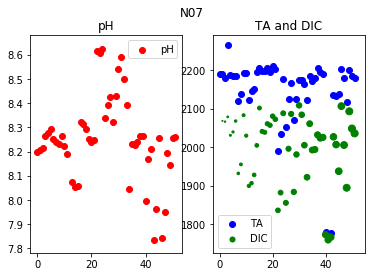

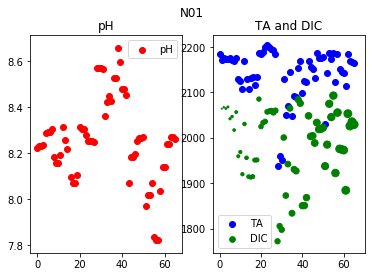

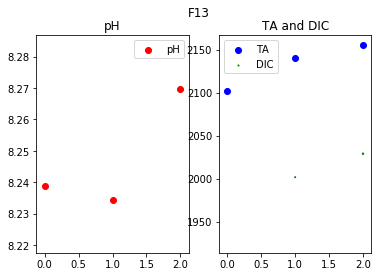

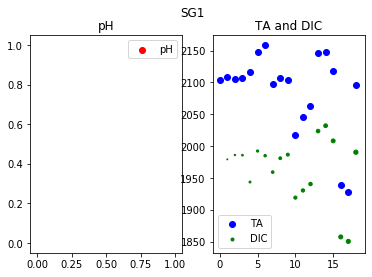

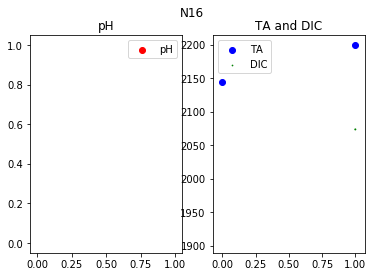

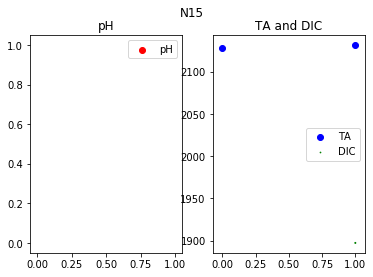

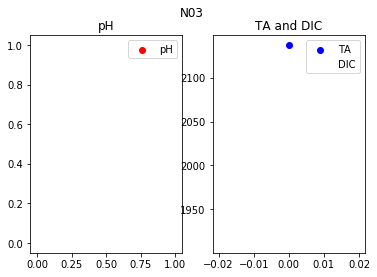

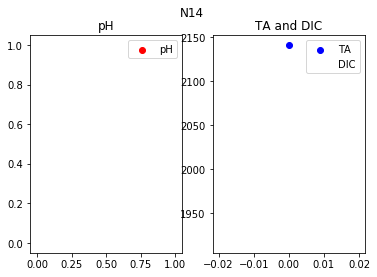

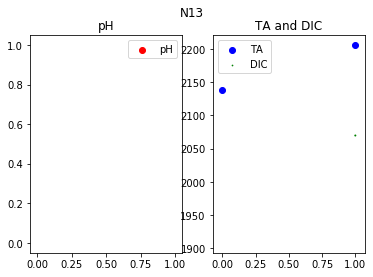

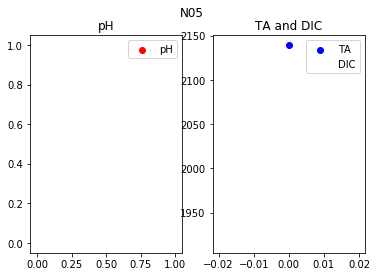

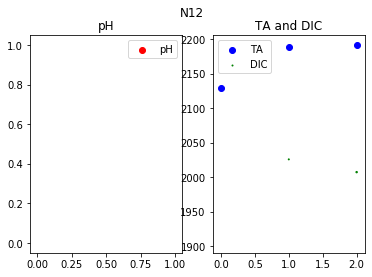

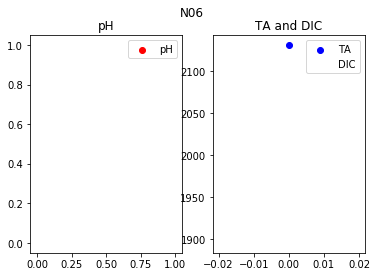

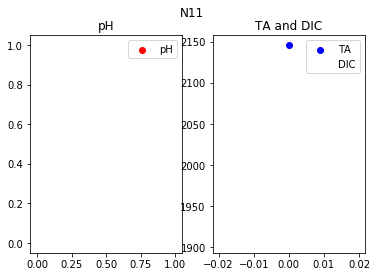

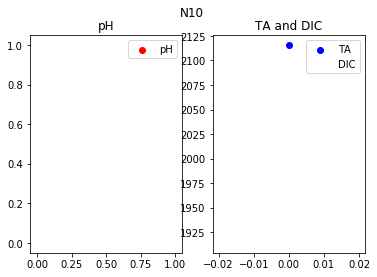

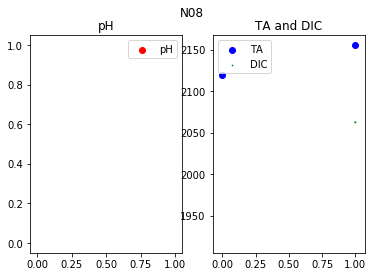

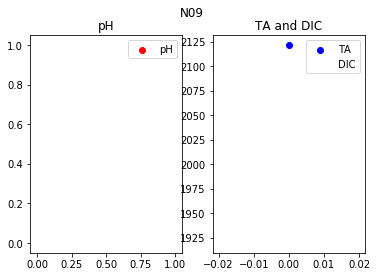

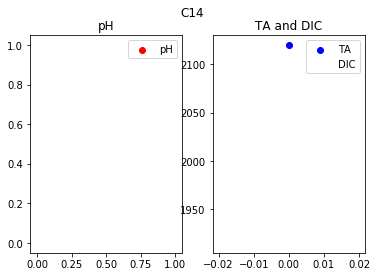

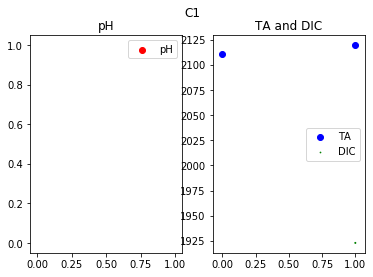

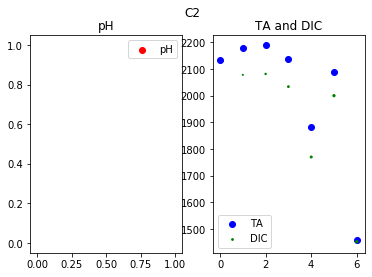

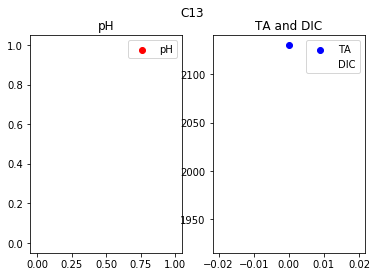

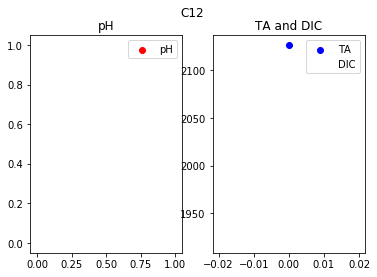

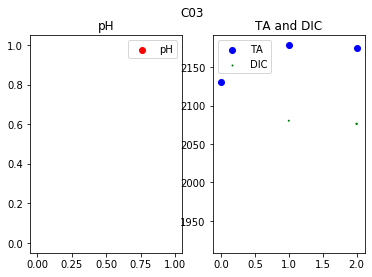

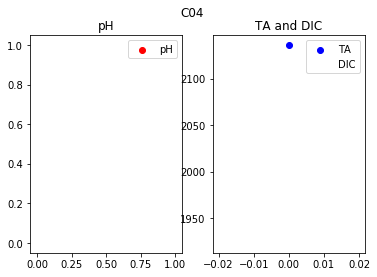

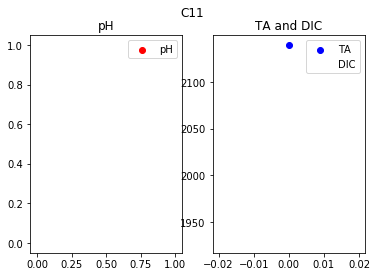

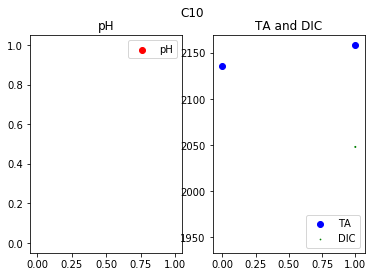

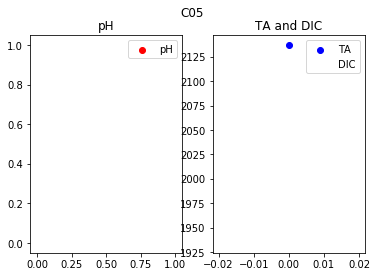

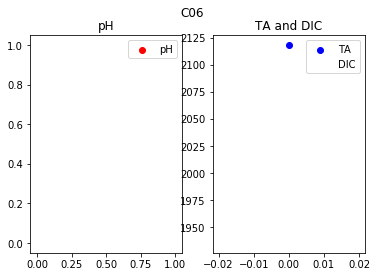

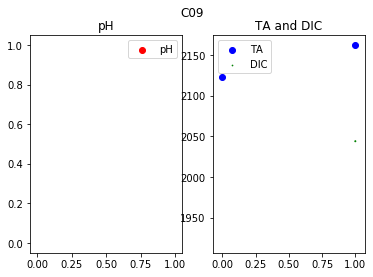

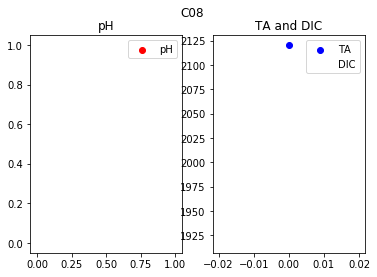

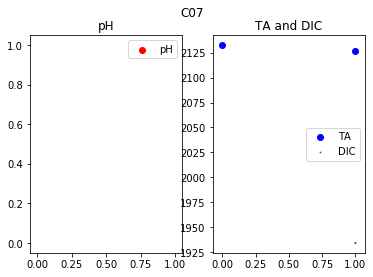

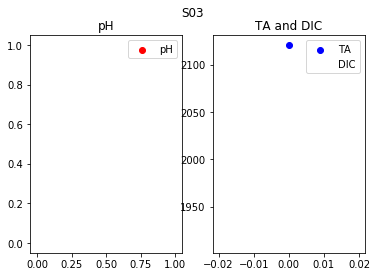

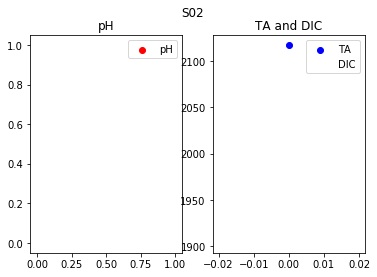

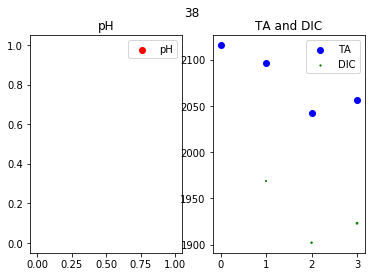

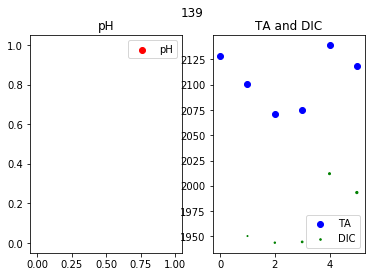

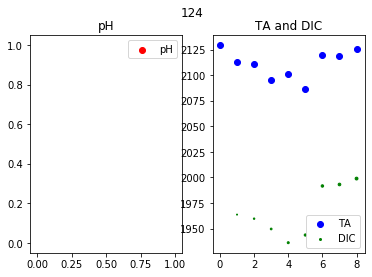

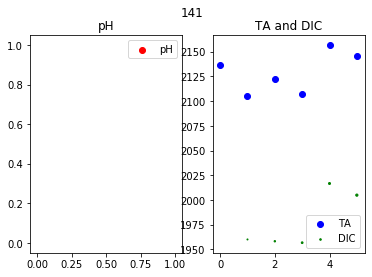

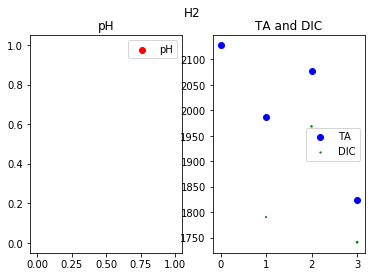

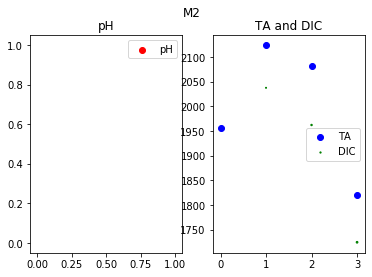

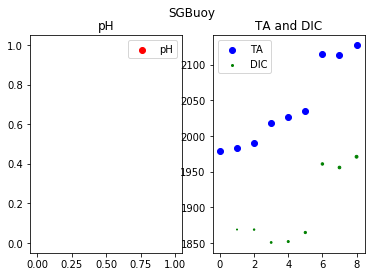

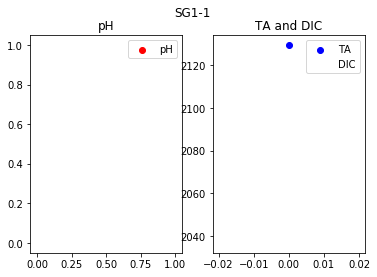

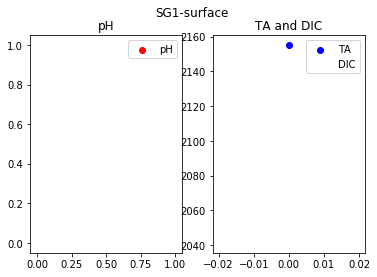

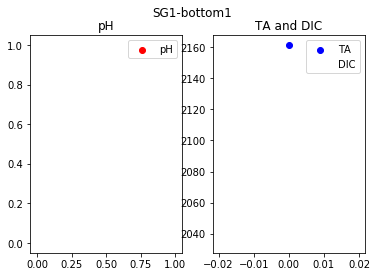

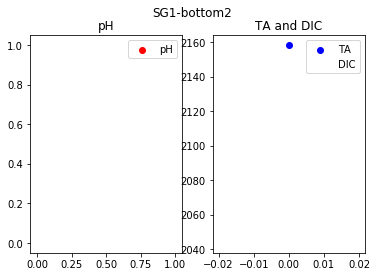

In [22]:
# Create a scatterplot for each station
for station_id in station_ids:
  station_data = graphing_data.loc[station_id]
  y = list(range(len(station_data['pH'])))
  # Scatter the ph and ta + dic data in seperate subplots
  fig = plt.figure()
  fig.suptitle(station_id)
  ax1 = fig.add_subplot(1, 2, 1)
  ax1.scatter(y, station_data['pH'], c='r')
  ax1.set_title('pH')
  ax1.legend( ['pH'])
  ax2 = fig.add_subplot(1, 2, 2)
  ax2.scatter(y, station_data['TA'], c='b')
  ax2.scatter(y, station_data['DIC'], y, c='g')
  ax2.set_title('TA and DIC')
  ax2.legend(['TA', 'DIC'])